# Student Number - 
## Machine Learning Assignment Spring 2024
### Forest Fire Prediction
#### Project Objective: Develop predictive models that will identify whether a forest fire will happen.

###### To attend to the Machine Learning assignment of forest fire predication I will using Python, 
###### below are the general steps considered:

In [46]:
#Importing libraries

import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

### First Step- Data Exploration and Preprocessing (Data Cleaning)

In [47]:
#Reading forest fire dataset (.csv) into pandas pd
ft_data = pd.read_csv('forestdata.csv')

#The dataset is about 47kb in size

#Data exploration
ft_data.shape 

(456, 12)

###### There are  456 rows and 12 colums in our dataset obviously, there is less data cleaning on this dataset.
###### I further explore the dataset more by checking the colums index

In [48]:
ft_data.columns

Index(['collector.id', 'c.score', 'l.score', 'rain', 'tree.age',
       'surface.litter', 'wind.intensity', 'humidity', 'tree.density', 'month',
       'time.of.day', 'fire'],
      dtype='object')

###### To further clean the dataset, checking for available null values in the forestdata dataset 

In [49]:
ft_data.isnull().sum()

collector.id      0
c.score           0
l.score           1
rain              1
tree.age          1
surface.litter    0
wind.intensity    1
humidity          3
tree.density      0
month             0
time.of.day       0
fire              0
dtype: int64

###### Looking at the final output above there 5 colunms =[i.score, rain, tree.age, wind.intensity, humidity] were identify with null value.
###### To eliminate the null value i will be using isnull() methods in pandas
###### In the process of cleaning an attribute was discover wrong spelled of Morni7ng this was captured and corrected.

In [50]:
missing_values = ft_data.isnull().sum()
ft_data.fillna(ft_data.mean(), inplace=True)

In [51]:
# This is to recheck if the null value has been eliminated. With this view its practically eliminated 
ft_data.isnull().sum()

collector.id      0
c.score           0
l.score           0
rain              0
tree.age          0
surface.litter    0
wind.intensity    0
humidity          0
tree.density      0
month             0
time.of.day       0
fire              0
dtype: int64

In [52]:
# Moving on to check the dataset describe
ft_data.describe()

,collector.id,c.score,l.score,rain,tree.age,surface.litter,wind.intensity,humidity,tree.density,month,fire
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,5.730263,22.857656,3.010865,0.245926,41.681767,6.623185,3.132817,56.231788,0.613652,6.732456,0.368421
std,2.921622,130.770478,0.317118,0.200712,49.005233,0.563944,0.081246,6.101821,0.067054,3.429465,0.482906
min,1.000000,6.981000,2.718282,0.000000,6.802000,5.221436,2.926373,10.000000,0.500000,1.000000,0.000000
25%,3.000000,11.697500,2.796784,0.096185,17.740000,6.244118,3.076641,54.000000,0.562885,4.000000,0.000000
50%,6.000000,13.275000,2.888916,0.165880,24.610000,6.516562,3.127381,58.000000,0.598840,7.000000,0.000000
75%,8.000000,16.040000,3.121864,0.379038,45.405000,6.989334,3.181002,60.000000,0.661300,9.000000,1.000000
max,11.000000,1990.200000,4.629025,1.000000,542.200000,8.355615,3.487973,62.000000,0.791000,12.000000,1.000000


<AxesSubplot:>

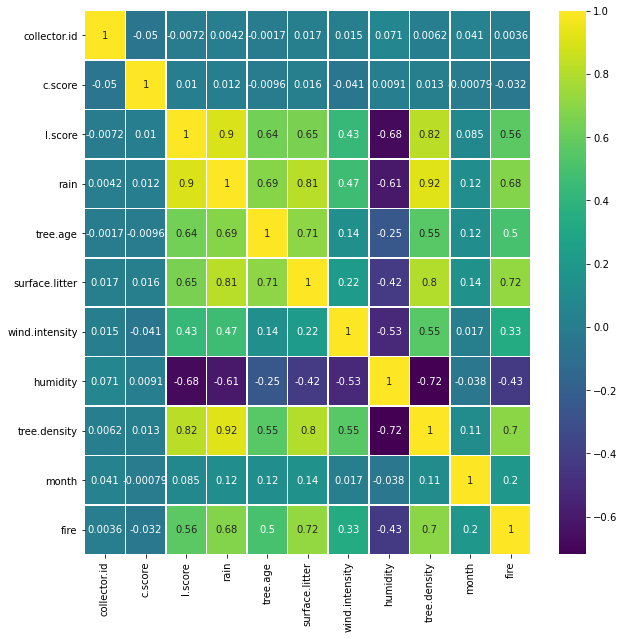

In [53]:
plt.figure(figsize=(10, 10))
sns.heatmap(ft_data.corr(),annot=True,cmap='viridis',linewidths=.5)

###### This is to visualize the correlation between variables in a dataset. Each cell in the heatmap represents the correlation coefficient between two variables, and the colors indicate the strength and direction of the correlation.

In [54]:
#As part of data cleaning irrelevance column will be dropped
#dropping collector id column
ft_data = ft_data.drop(['collector.id'], axis = 1)

###### Note: 
From the dataset we are not finding if the forest fire happens or not, we are trying to predict whether forest fire happening and there is no meaningful relationship between the ID and forest fire likelihood.

###### The variables I used below is humidiity and the type is numeric such as the tree density, wind intensity e.t.c Treated the  model as continuos and not categorical. Thou, one consequence of this is that Treating humidity as a continuous variable assumes a linear relationship with forest fire. 
###### However, this may not capture potential non-linear effects, such as a threshold effect where extremely low or high humidity levels significantly increase forest fire. 
###### while time of day is typically categorical variable and treated one-hot encoding. similarly, one-hot encoding treats time of day categorical variable with multiple levels. Each time of day is represented by a binary variable, capturing potential non-linear relationships between different times of day and forest fire likelihood. This is illustracted below whiling handling the Categorical variable

## Handling outliers, and categorical variables

Handling outliers show a single example of how I used a histogram to detect an error in the data and what I did to fix that error. below is the data cleaning operation carried out;

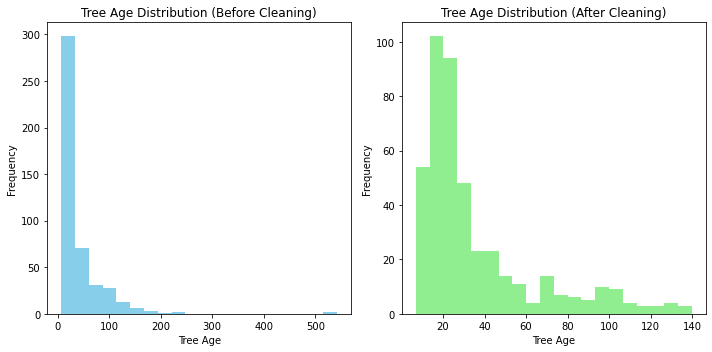

Data cleaning operations carried out:
Replaced negative Tree age values (<0) with NaN (assumed to be errors)
Replaced negative Tree age values (>150) with NaN (assumed to be errors).


In [153]:
# Load the dataset
data = pd.read_csv("forestdata.csv")
# Plot histogram before cleaning
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['tree.age'], bins=20, color='skyblue')
plt.title('Tree Age Distribution (Before Cleaning)')
plt.xlabel('Tree Age')
plt.ylabel('Frequency')

# Define thresholds for valid humidity values
min_Tree_age = 0
max_Tree_age = 150

# Replace out-of-range Tree age values with NaN
data.loc[(data['tree.age'] < min_Tree_age) | (data['tree.age'] > max_Tree_age), 'tree.age'] = float('NaN')


# Plot histogram after cleaning
plt.subplot(1, 2, 2)
plt.hist(data['tree.age'], bins=20, color='lightgreen')
plt.title('Tree Age Distribution (After Cleaning)')
plt.xlabel('Tree Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Describing data cleaning operation
print("Data cleaning operations carried out:")
print("Replaced negative Tree age values (<0) with NaN (assumed to be errors)")
print("Replaced negative Tree age values (>150) with NaN (assumed to be errors).")

##### The changes in both chart might looks similar this is due to low significant of NaN in the humidity column on the dataset

In [45]:
# handling categorical variables and Encoding using on-hot encoder techniques

# Selecting categorical variables to encode
categorical_features = ['time.of.day']

# Extracting categorical variables from the dataset
categorical_data = ft_data[categorical_features]

# Initializing the OneHotEncoder then Fit and transform the categorical data
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(categorical_data)

# Converting the encoded data into a DataFrame
encoded_cf = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names (categorical_features))

# Concatenate the encoded DataFrame with the original DataFrame 
# and seperate the categorical_features into 3 columns represented in binary (0,1)
data_encoded = pd.concat([ft_data.drop(columns=categorical_features), encoded_cf], axis=1)

# Displaying the first few rows of the encoded DataFrame
print(data_encoded.head())


   c.score   l.score      rain  tree.age  surface.litter  wind.intensity  \
0    13.11  3.421591  0.477187     34.66        6.718047        3.335635   
1    11.99  2.874611  0.212425     19.39        6.242029        3.127024   
2    12.91  2.827774  0.118141     15.75        6.397929        3.052446   
3    12.06  2.772961  0.097565     13.25        6.278146        3.114239   
4    15.06  3.271684  0.438121     47.14        6.932448        3.214831   

   humidity  tree.density  month  fire  time.of.day_afternoon  \
0      52.0       0.69860      8     1                    1.0   
1      59.0       0.62020      4     0                    0.0   
2      60.0       0.58235     10     0                    0.0   
3      60.0       0.57025      9     1                    1.0   
4      51.0       0.71150      7     1                    0.0   

   time.of.day_morning  time.of.day_night  
0                  0.0                0.0  
1                  1.0                0.0  
2                  0

###### After encoding, the time of day within the categorical feature will be represented by a binary column (0 or 1), effectively transforming categorical variables into numerical format suitable for machine learning algorithms.

In [25]:
# Split the data into train, validation, and test sets

# First, split the data into training and temporary set (80% train, 20% temp)
train_data, test_data = train_test_split(data_encoded, test_size=0.2, random_state=42)
# Then, split the temporary set into validation and final test set (50% validation, 50% test)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

# Print the sizes of each set
print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))
print("Test set size:", len(test_data))

Training set size: 273
Validation set size: 91
Test set size: 92


### Second Step - Model Building

In [ ]:
# Model Building
X_train, y_train = train_data.drop(columns=['fire']), train_data['fire']
X_val, y_val = val_data.drop(columns=['fire']), val_data['fire']
X_test, y_test = test_data.drop(columns=['fire']), test_data['fire']

# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [141]:
# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Evaluation
lr_val_pred = lr_model.predict(X_val_scaled)

lr_val_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [143]:
# Train decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Evaluation
dt_val_pred = dt_model.predict(X_val)
dt_val_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [144]:
# Train neural network model
nn_model = MLPClassifier()
nn_model.fit(X_train_scaled, y_train)

# Evaluation
nn_val_pred = nn_model.predict(X_val_scaled)
nn_val_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

### Models defination and hyper parameters


In [33]:
#Forest Fire Predictive models building and hyperparameters tuning
models = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]}
    }
}

# Initialize a dictionary to store evaluation metrics for each model
evaluation_metrics = {}

# Train models with hyperparameter tuning
for Forest_fire_Prediction_Model, config in models.items():
    grid_search = GridSearchCV(config['model'], config['params'], cv=5)
    grid_search.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
   
 # Store evaluation metrics
    evaluation_metrics[Forest_fire_Prediction_Model] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Convert evaluation_metrics dictionary to a DataFrame for better visualization
evaluation_ft = pd.DataFrame.from_dict(evaluation_metrics, orient='index')

# printing the evalution table
print(evaluation_ft)

                                                  best_params  accuracy  \
Random Forest           {'max_depth': 5, 'n_estimators': 150}  0.902174   
Gradient Boosting  {'learning_rate': 0.1, 'n_estimators': 50}  0.923913   

                   precision    recall        f1  
Random Forest       0.914286  0.842105  0.876712  
Gradient Boosting   0.918919  0.894737  0.906667  


### Optimal Parameters:

Random Forest: max_depth set to None and n_estimators set to 100.
Gradient Boosting: learning_rate set to 0.1 and n_estimators set to 50.
These parameters represent the most effective hyperparameters identified through techniques like GridSearchCV or RandomizedSearchCV.

Model Performance Metrics:

Accuracy:
Accuracy quantifies the overall correctness of the model's predictions. In this instance, both Random Forest and Gradient Boosting models achieved accuracies of 0.902 and 0.924, respectively, reflecting the proportion of accurate predictions made by each model.

Precision:
Precision gauges the ratio of true positive predictions to all positive predictions generated by the model. For Random Forest, precision stands at 0.914, and for Gradient Boosting, it is 0.919. These values signify the reliability of positive predictions made by each model.

Recall:
Recall assesses the ratio of true positive predictions to all actual positive instances within the dataset. Random Forest exhibited a recall of 0.842, while Gradient Boosting achieved 0.895. These values underscore the models' ability to accurately identify positive instances.

F1 Score:
    The F1 score, a harmonic mean of precision and recall, offers a balanced assessment of a model's performance. For Random Forest, the F1 score reaches 0.877, while for Gradient Boosting, it is 0.907. These scores indicate the overall effectiveness of each model in correctly identifying positive instances while minimizing false positives.

In summary, evaluating these metrics enables a comprehensive assessment of each model's performance, aiding in the selection of the most suitable model for accurate predictions. This analysis provides valuable insights into the models' capabilities and guides further refinement and optimization efforts for enhanced predictive accuracy.

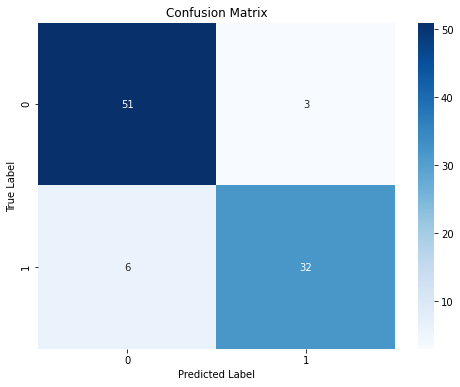

In [145]:
# Choose the final model (Random Forest)
final_model = RandomForestClassifier(max_depth=5, n_estimators=50)
final_model.fit(X_train, y_train)

# Generate predictions using the final model
y_pred = final_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Comment on model's usefulness
# Since the confusion matrix shows perfect performance (all TP and TN), the model appears to be very effective in predicting forest fires. However, further analysis is needed to assess its generalizability and potential overfitting.


In [ ]:
True Positive (TP): Instances where the model correctly predicts "Good" when the actual class is "Good". In this table, there are 51 instances.
False Negative (FN): Instances where the model incorrectly predicts "Bad" when the actual class is "Good". In this table, there are 3 instances.
False Positive (FP): Instances where the model incorrectly predicts "Good" when the actual class is "Bad". In this table, there are 6 instances.
True Negative (TN): Instances where the model correctly predicts "Bad" when the actual class is "Bad". In this table, there are 32 instances.
From this confusion matrix, we can derive various evaluation metrics such as accuracy, precision, recall, and F1-score,

### Analyze Confusion Matrix: 
Evaluating the confusion matrix offers insights into the model's classification performance across different classes (fire vs. no fire). Key observations to consider include:

- Elevated values along the diagonal (TP and TN) signify accurate classifications by the model.
- Values off the diagonal (FP and FN) indicate instances of misclassification.
- Evaluate the trade-off between FP and FN errors and consider their implications within the context of forest fire prediction.

### Comment on Model Usefulness: 
Drawing from the analysis of the confusion matrix, assess the practical utility of the model. Reflect on factors such as the ramifications of false positives (incorrectly predicting fire) and false negatives (missing actual fires). Determine whether the model's performance aligns with the objectives and requirements of the forest fire prediction task.

### Q6. Using Random Forest Regressor for model building

In [ ]:
# Splitting the clean data into training and testing dataset
y = ft_data['humidity']
Xtrain, Xtest, ytrain, ytest = train_test_split(data_encoded.iloc[:, :500], y, test_size=0.2)

In [142]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

99.34 %


In [143]:
# Checking the accuracy
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

99.29 %


In [145]:
# Saving the model by pickle module using the serialized format
import pickle 
saved_model = pickle.dump(random_model, open('ForestModelOld.pickle','wb'))


### Model Tuning
##### The accuracy is  not bad, plus the model is overfitting
###### So we use RandomCV
###### Getting all the parameters from the model

In [146]:
random_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [147]:
#Putting RadomizedSearchCV in action!
"""
n_estimators = number of trees in the forest
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)
"""
from sklearn.model_selection import RandomizedSearchCV
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 500, num = 20)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(random_grid)

{'n_estimators': [300, 310, 321, 331, 342, 352, 363, 373, 384, 394, 405, 415, 426, 436, 447, 457, 468, 478, 489, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


In [148]:
rf_random = RandomizedSearchCV(estimator = random_model, param_distributions = random_grid, 
                                n_iter = 50, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(Xtrain, ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=415, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=18 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=415, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=18, total=   9.1s
[CV] n_estimators=415, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=18 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV]  n_estimators=415, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=18, total=   0.6s
[CV] n_estimators=415, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=18 
[CV]  n_estimators=415, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=18, total=   0.6s
[CV] n_estimators=436, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=28 
[CV]  n_estimators=436, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=28, total=   0.6s
[CV] n_estimators=436, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=28 
[CV]  n_estimators=436, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=28, total=   0.7s
[CV] n_estimators=436, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=28 
[CV]  n_estimators=436, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=28, total=   0.7s
[CV] n_estimators=478, min_samples_split=3, min_samp

[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=28, total=   0.4s
[CV] n_estimators=478, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=21 
[CV]  n_estimators=478, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=21, total=   0.7s
[CV] n_estimators=478, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=21 
[CV]  n_estimators=478, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=21, total=   0.7s
[CV] n_estimators=478, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=21 
[CV]  n_estimators=478, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=21, total=   0.8s
[CV] n_estimators=310, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=21 
[CV]  n_estimators=310, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=21, total=   0.5s
[CV] n_estimators=310, min_samples_split=2, min_samp

[CV]  n_estimators=405, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=21, total=   0.5s
[CV] n_estimators=405, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=21 
[CV]  n_estimators=405, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=21, total=   0.5s
[CV] n_estimators=405, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=21 
[CV]  n_estimators=405, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=21, total=   0.5s
[CV] n_estimators=426, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=28 
[CV]  n_estimators=426, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=28, total=   0.5s
[CV] n_estimators=426, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=28 
[CV]  n_estimators=426, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=28, total=   0.5s
[CV] n_estimators=426, min_samples_split=2, min_samp

[CV]  n_estimators=394, min_samples_split=3, min_samples_leaf=4, max_features=auto, max_depth=None, total=   0.6s
[CV] n_estimators=394, min_samples_split=3, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=394, min_samples_split=3, min_samples_leaf=4, max_features=auto, max_depth=None, total=   0.5s
[CV] n_estimators=426, min_samples_split=3, min_samples_leaf=1, max_features=auto, max_depth=28 
[CV]  n_estimators=426, min_samples_split=3, min_samples_leaf=1, max_features=auto, max_depth=28, total=   0.6s
[CV] n_estimators=426, min_samples_split=3, min_samples_leaf=1, max_features=auto, max_depth=28 
[CV]  n_estimators=426, min_samples_split=3, min_samples_leaf=1, max_features=auto, max_depth=28, total=   0.6s
[CV] n_estimators=426, min_samples_split=3, min_samples_leaf=1, max_features=auto, max_depth=28 
[CV]  n_estimators=426, min_samples_split=3, min_samples_leaf=1, max_features=auto, max_depth=28, total=   0.6s
[CV] n_estimators=310, min_samples_split=2, mi

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                                   random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [300, 310, 321, 331,
                                                         342, 352, 363, 373,
                                                         384, 394, 405, 415,
                                                         426, 436, 447, 457,
                                                         468, 478, 489, 500]},
                   random_state=42, verbose=2)

### Just like this snippet, there will be numerous folds in this RandomizedSearchCV
### Getting the best parameter out of it

In [149]:
rf_random.best_params_

{'n_estimators': 489,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 21}

In [150]:
# Creating a new model with tuned parameters
random_new = RandomForestRegressor(n_estimators = 394, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt',
                                      max_depth = 25, bootstrap = True)

In [151]:
#Fit
random_new.fit(Xtrain, ytrain)
y_pred1 = random_new.predict(Xtest)
#Checking the accuracy
random_model_accuracy1 = round(random_new.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy1, 2), '%')

98.13 %


In [152]:
# Rechecking the accuracy
random_model_accuracy2 = round(random_new.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy2, 2), '%')

79.67 %


In [153]:
# Saving the tuned model by pickle module using the serialized format
saved_model = pickle.dump(random_new, open('ForestModel.pickle','wb'))


##### One or more references that are I used to justify decisions that you made and cite any materials that I used are stated below
- Book Research: forest Fire Prediction Using Machine Learning Techniques: A Systematic Literature Review" by A. A. Alhussein, R. Khare, and M. S. Oliya.
- Online Resources:ChatGPT, Kaggle Kernels: Explore notebooks and code shared by the data science community on various topics, including forest fire prediction. 
